In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler,normalize
from sklearn.decomposition import PCA
import data_processing as dp
from scipy import signal
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
import pywt
import os
import time
import h5py
from itertools import combinations

In [2]:
# read file name of data with various Labels
df = pd.read_csv('./useful_data_label.csv',index_col=0) 
# read file name of data with only label 0
df2 = pd.read_csv('./unuseful_data_label.csv',index_col=0)
# read some of the data with only label 0
df3 = pd.read_csv('./data/file_name.txt',header=None)

In [3]:
import imp
imp.reload(dp)

<module 'data_processing' from 'E:\\Document\\jupyter\\Master Thesis\\data_processing.py'>

In [15]:
# read the data and labels of df2 or df3
sc = StandardScaler(with_mean = False)
#sc = MinMaxScaler()
ind = df2.iloc[1].isna()
#files = np.concatenate([np.array(df.columns),np.array('正常/'+df2.columns[ind])])
files = np.array(df.columns[[2,5,6,7,8,10,11,12,13,16,17,18,19,20]])
N = len(files)
#sc = StandardScaler(with_mean=False)
width = 1024
stride = 256
start = time.time()
i = 0
X = []
Y = []
X2 = []
Y2 = []
F = []
F2 = []
for file in files:
    i += 1
    if file.find('G04')==0:
        continue
    emg_data = pd.read_csv('./data/'+file)
    #emg_data.iloc[:,3:] = 
    emg_data = emg_data.dropna().reset_index(drop=True)
    #emg_data.iloc[:,3:]=normalize(emg_data.iloc[:,3:],axis=0)
    #emg_data.iloc[:,3:] = sc.fit_transform(emg_data.iloc[:,3:])
    fn = 350
    wn=2*fn/1000
    fn1 = 300
    wn1 = 2*fn1/1000
    fs = 1000.0  # Sample frequency (Hz)
    f0 = 50  # Frequency to be removed from signal (Hz)
    Q = 100.0  # Quality factor
    # Design notch filter
    #b1, a1 = signal.iirnotch(f0, Q, fs)
    #b, a = signal.butter(4, [wn,wn1], 'bandpass')
    b, a = signal.butter(4, [wn], 'lowpass')
    #for j in ['LEFT_TA','LEFT_TS','LEFT_BF','LEFT_RF','RIGHT_TA','RIGHT_TS','RIGHT_BF','RIGHT_RF']:
        #emg_data.loc[:,j] = signal.filtfilt(b, a, emg_data.loc[:,j])
        #emg_data.loc[:,j] = signal.filtfilt(b1, a1, emg_data.loc[:,j])
    x,y = dp.generate_window_slide_data(emg_data,width=width,
                                        stride=stride,
                                        scaler=False,
                                        same_label=True)
    #x=np.abs(x)
    #x=dp.lowpass_filter(x,300)
    ind1 = []
    ind2 = []
    l = len(y)
    for j in set(y):
        ind = np.where(y == j)[0].tolist()
        l_t = len(ind)
        ind1 += ind[:int(l_t*0.8)]
        ind2 += ind[int(l_t*0.8):]

    l1 = len(ind1)
    l2 = len(ind2)

    fi = [file]*len(ind1)
    fi2 = [file]*len(ind2)
    X += x[ind1].tolist()
    Y += y[ind1].tolist()
    F += fi
    X2 += x[ind2].tolist()
    Y2 += y[ind2].tolist()
    F2 += fi2
    print('%d/%d: '%(i,N)+file)

ind_c = [True,True,False,False,True,True,False,False]
X = np.array(X)#[:,:,ind_c]
Y = np.array(Y)
X2 = np.array(X2)#[:,:,ind_c]
Y2 = np.array(Y2)
end = time.time()
duration = end-start
print('Duration: %f'%(duration))

1/14: G06_FoG_trial_1_emg.csv
2/14: G07_Freezing_Trial1_trial_1_emg.csv
3/14: G08_FoG_1_trial_1_emg.csv
4/14: G08_FoG_2_trial_1_emg.csv
5/14: G11_FoG_trial_1_emg.csv
6/14: P379_M050_2_OFF_A_FoG_trial_1_emg.csv
7/14: P379_M050_2_OFF_A_FoG_trial_2_emg.csv
8/14: P379_M050_2_OFF_A_FoG_trial_3_emg.csv
9/14: P379_M050_2_OFF_B_FoG_trial_1_emg.csv
10/14: P551_M050_2_A_FoG_trial_1_emg.csv
11/14: P551_M050_2_B_FoG_trial_1_emg.csv
12/14: P551_M050_2_B_FoG_trial_2_emg.csv
13/14: P812_M050_2_B_FoG_trial_1_emg.csv
14/14: P812_M050_2_B_FoG_trial_2_emg.csv
Duration: 12.819222


In [201]:
# read the data and labels of df2 or df3
sc = StandardScaler()
#sc = MinMaxScaler()
ind = df2.iloc[1].isna()
#files = np.concatenate([np.array(df.columns),np.array('正常/'+df2.columns[ind])])
#files = np.array(df.columns)
files = np.array(df.columns[[2,5,6,7,8,10,11,12,13,16,17,18,19,20]])
N = len(files)
#sc = StandardScaler(with_mean=False)
width = 1024
stride = 256
start = time.time()
i = 0
X = []
Y = []
X2 = []
Y2 = []
F = []
F2 = []
for file in files:
    i += 1
    emg_data = pd.read_csv('./data/'+file)
    #emg_data.iloc[:,3:] = 
    emg_data = emg_data.dropna().reset_index(drop=True)
    #emg_data.iloc[:,3:]=normalize(emg_data.iloc[:,3:])
    #emg_data.iloc[:,3:] = sc.fit_transform(emg_data.iloc[:,3:])
    fn = 20
    wn=2*fn/1000
    fn1 = 350
    wn1 = 2*fn1/1000
    fs = 1000.0  # Sample frequency (Hz)
    f0 = 50  # Frequency to be removed from signal (Hz)
    Q = 100.0  # Quality factor
    # Design notch filter
    b1, a1 = signal.iirnotch(f0, Q, fs)
    b, a = signal.butter(4, [wn,wn1], 'bandpass')
    #b, a = signal.butter(4, [wn], 'highpass')
    #for j in ['LEFT_TA','LEFT_TS','LEFT_BF','LEFT_RF','RIGHT_TA','RIGHT_TS','RIGHT_BF','RIGHT_RF']:
        #emg_data.loc[:,j] = signal.filtfilt(b, a, emg_data.loc[:,j])
        #emg_data.loc[:,j] = signal.filtfilt(b1, a1, emg_data.loc[:,j])
    x,y = dp.generate_window_slide_data(emg_data,width=width,
                                        stride=stride,
                                        scaler=False,
                                        same_label=True)
    #x=np.abs(x)
    #x=dp.lowpass_filter(x,300)
    
    if file == 'G08_FoG_1_trial_1_emg.csv':
        X2 += x.tolist()
        Y2 += y.tolist()
        print('%d/%d: '%(i,N)+file)
        continue

    X += x.tolist()
    Y += y.tolist()

    print('%d/%d: '%(i,N)+file)
    
X = np.array(X)
Y = np.array(Y)
X2 = np.array(X2)
Y2 = np.array(Y2)
end = time.time()
duration = end-start
print('Duration: %f'%(duration))

1/14: G06_FoG_trial_1_emg.csv
2/14: G07_Freezing_Trial1_trial_1_emg.csv
3/14: G08_FoG_1_trial_1_emg.csv
4/14: G08_FoG_2_trial_1_emg.csv
5/14: G11_FoG_trial_1_emg.csv
6/14: P379_M050_2_OFF_A_FoG_trial_1_emg.csv
7/14: P379_M050_2_OFF_A_FoG_trial_2_emg.csv
8/14: P379_M050_2_OFF_A_FoG_trial_3_emg.csv
9/14: P379_M050_2_OFF_B_FoG_trial_1_emg.csv
10/14: P551_M050_2_A_FoG_trial_1_emg.csv
11/14: P551_M050_2_B_FoG_trial_1_emg.csv
12/14: P551_M050_2_B_FoG_trial_2_emg.csv
13/14: P812_M050_2_B_FoG_trial_1_emg.csv
14/14: P812_M050_2_B_FoG_trial_2_emg.csv
Duration: 12.509394


In [263]:
coes = pywt.wavedec(X,wavelet=wavelet,mode=0,level=level,axis=1)

In [ ]:
rec=pywt.idwt(coes[0],coes[3],wavelet='db10',mode=0,axis=1)

(2199, 82, 8)

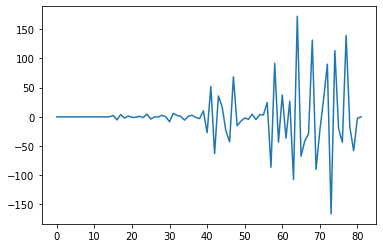

In [302]:
plt.plot(rec[0,:,0])
rec.shape

In [4]:
def get_features_from_dwt(data,wavelet='db7',level=5,mode=0):
    coes = pywt.wavedec(data,wavelet=wavelet,mode=mode,level=level,axis=1)
    n,l,c = coes[-1].shape
    feature = np.zeros((n,l,c,0))
    for i in range(len(coes)-1):
        #if i == 0:
        #    rec = pywt.idwt(coes[i],None,wavelet=wavelet,mode=mode,axis=1)
        #else:
        #    rec = pywt.idwt(None,coes[i],wavelet=wavelet,mode=mode,axis=1)
        temp = signal.resample(coes[i],l,axis=1)[:,:,:,np.newaxis]
        feature = np.concatenate([feature,temp],axis=3)
        #print(feature.shape)
    #print(coes[-1].shape)
    #rec = pywt.idwt(None,coes[-1],wavelet=wavelet,mode=mode,axis=1)
    #print(rec.shape)
    feature = np.concatenate([feature,coes[-1][:,:,:,np.newaxis]],axis=3)
    return feature

def get_idwt(data,wavelet='db7',level=5,mode=0):
    coes = pywt.wavedec(data,wavelet=wavelet,mode=mode,level=level,axis=1)
    n,l,c = data.shape
    feature = np.zeros((n,l,c,0))
    for i in range(len(coes)-1):
        if i == 0:
            rec = pywt.idwt(coes[i],None,wavelet=wavelet,mode=mode,axis=1)
        else:
            rec = pywt.idwt(None,coes[i],wavelet=wavelet,mode=mode,axis=1)
        temp = signal.resample(coes[i],l,axis=1)[:,:,:,np.newaxis]
        feature = np.concatenate([feature,temp],axis=3)
        #print(feature.shape)
    #print(coes[-1].shape)
    rec = pywt.idwt(None,coes[-1],wavelet=wavelet,mode=mode,axis=1)
    #print(rec.shape)
    feature = np.concatenate([feature,rec[:,:,:,np.newaxis]],axis=3)
    return feature

def get_features_from_idwt(data,wavelet='db7',level=5):
    #coes = pywt.wavedec(data,wavelet=wavelet,mode=0,level=level,axis=1)
    coes = get_features_from_dwt(data,wavelet,level)
    n,l,c,d = coes.shape
    feature = np.zeros((n,8,0))
    for i in range(d):
        #IEMG = pd.DataFrame(compute_IEMG(coes[i]),columns=columns+'_IEMG')
        RMS = dp.compute_RMS(coes[:,:,:,i])[:,:,np.newaxis]
        #WL = pd.DataFrame(dp.compute_WL(coes[i]),columns=columns+'_WL%d'%i)
        ZC = dp.compute_ZC(coes[:,:,:,i],1e-3)[:,:,np.newaxis]
        ku = dp.compute_ku(coes[:,:,:,i])[:,:,np.newaxis]
        #SSC = pd.DataFrame(dp.compute_SSC(coes[i],threshold_SSC),columns=columns+'_SSC%d'%i)
        #WAMP = dp.compute_WAMP(coes[:,:,:,i],threshold_WAMP)[:,:,np.newaxis]
        skew = dp.compute_Skewness(coes[:,:,:,i])[:,:,np.newaxis]
        Acti = dp.compute_Acti(coes[:,:,:,i])[:,:,np.newaxis]
        AR = dp.compute_AR(coes[:,:,:,i])[:,:,np.newaxis]
        #AR = dp.compute_AR_pd(coes[i])
        #HIST = dp.compute_HIST_pd(coes[i],bins=bins,ranges=ranges)
        #FHIST = dp.compute_FHIST_pd(coes[i],bins=fbins,ranges=franges,threshold=threshold_F)
        #MF = dp.compute_MaxFreq_pd(coes[i],num=num)
        MDF = dp.compute_MDF(coes[:,:,:,i])[:,:,np.newaxis]
        MNF = dp.compute_MNF(coes[:,:,:,i])[:,:,np.newaxis]
        feature = np.concatenate([feature,RMS,ZC,ku,skew,Acti,AR,MDF,MNF],axis =2)
    return feature

In [16]:
wavelet = 'haar'
level = 5
feature=get_features_from_dwt(X,wavelet,level,1).transpose((0,2,1,3))
feature2=get_features_from_dwt(X2,wavelet,level,1).transpose((0,2,1,3))
#feature=get_idwt(X,wavelet,level).transpose((0,2,1,3))
#feature2=get_idwt(X2,wavelet,level).transpose((0,2,1,3))

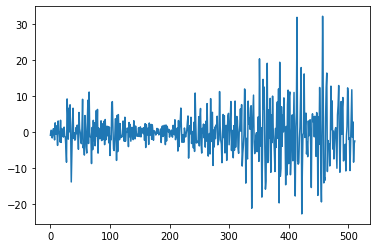

In [17]:
plt.plot(feature[1000,7,:,5])
#plt.figure()
#plt.plot(feature.transpose((0,2,1,3))[10,0,:,4])

In [114]:
np.where(Y==2)

(array([  67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
          78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
          89,  188,  189,  190,  191,  192,  193,  194,  195,  196,  197,
         198,  199,  200,  201,  202,  203,  204,  205,  206,  548,  549,
         550,  551,  552,  553,  554,  555,  556,  557,  558,  559,  560,
         561,  562,  563,  564,  565,  566,  567,  568,  569,  570,  571,
         572,  573,  574,  575,  576,  577,  578,  579,  580,  581,  582,
         583,  584,  585,  586,  587,  588,  589,  590,  591,  592,  593,
         594,  595,  596,  597,  598,  599,  600,  601,  602,  603,  604,
         605,  606,  607,  608,  609,  610,  611,  612,  613,  614,  615,
         616,  617,  618,  619,  620,  621,  622,  623,  624,  625,  626,
         627,  628,  629,  630,  631,  632,  633,  634,  635,  636,  637,
         638,  639,  640,  641,  642,  643,  644,  645,  646,  647, 1036,
        1037, 1038, 1039, 1040, 1041, 

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import save_model,load_model
from tensorflow.keras import callbacks, Model, models
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import TruncatedNormal
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve,confusion_matrix,accuracy_score
import tensorflow as tf
from tensorflow.keras import backend as K
from imblearn.over_sampling import SMOTE

In [8]:
def train_model(model,feature,y,binary=True,file=None):
    if binary:
        ind = ((y==0)|(y==1)|(y==2)|(y==3)|(y==4)|(y==6))
        ind1 = ((y==4)|(y==1)|(y==2)|(y==3)|(y==6))
        y_01 = y.copy()
        #ind1 = ((y_01==1)|(y_01==2)|(y_01==6))
        y_01[ind1] = 1
        oc = OneHotEncoder()
        y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
        cw = None#{0:1,1:5}
    else:
        ind = ((y==1)|(y==2)|(y==6))
        #ind = ((y==2)|(y==6))
        y_01 = y[ind].copy()
        oc = OneHotEncoder()
        y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
        cw = None#{0:5,1:1,2:1}#{0:2,1:1,2:10,3:2}
    x_full,x_test,y_full,y_test = train_test_split(np.array(feature)[ind,:],y_01,
                                                   test_size=0.2,
                                                   random_state=123,
                                                   shuffle=True)
    x_train,x_valid,y_train,y_valid = train_test_split(x_full,y_full,
                                                       test_size=0.25,
                                                       random_state=555,
                                                       shuffle=True)
    
    x_train = x_full
    
    early_stopping = callbacks.EarlyStopping(patience = 10,
                                             monitor = 'val_loss', 
                                             restore_best_weights=True)
    history = model.fit(x_train,y_full,validation_data=(x_test,y_test),
                        epochs=300,batch_size=32,class_weight=cw,
                        callbacks=[early_stopping],
                        shuffle=True)
    
    if binary:
        y_pred_t=model.predict(x_test)
        test = accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1))
        #test = accuracy_score(y_test,y_pred_t>0.5)
        
        #y_pred_v=model.predict(x_valid)
        #valid = accuracy_score(y_valid,np.argmax(y_pred_v,axis=1))
        y_pred_ta=model.predict(x_train)
        train = accuracy_score(np.argmax(y_full,axis=1),np.argmax(y_pred_ta,axis=1))
        #train = accuracy_score(y_full,y_pred_ta>0.5)
        
        print('train: \n',confusion_matrix(np.argmax(y_full,axis=1),np.argmax(y_pred_ta,axis=1)))
        #print('valid: \n',confusion_matrix(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1)))
        print('test: \n',confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1)))
        
        #print('train: \n',metrics.confusion_matrix(y_full,y_pred_ta>0.5))
        #print('test: \n',metrics.confusion_matrix(y_test,y_pred_t>0.5))

    else:
        y_pred_t=model.predict(x_test)
        test = accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1))
        #y_pred_v=model.predict(x_valid)
        #valid = metrics.accuracy_score(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1))
        y_pred_ta=model.predict(x_train)
        train = accuracy_score(np.argmax(y_full,axis=1),np.argmax(y_pred_ta,axis=1))        
        print('train: \n',confusion_matrix(np.argmax(y_full,axis=1),np.argmax(y_pred_ta,axis=1)))
        #print('valid: \n',confusion_matrix(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1)))
        print('test: \n',confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1)))
    print('test:%f'%test)
    #print('valid:%f'%valid)
    print('train:%f'%train)
    if file != None:
        model.save_model(file)
    return train,test

def test_model(model,feature,y,binary=True):
    if binary:
        ind = ((y==0)|(y==1)|(y==2)|(y==3)|(y==4)|(y==6))
        #ind1 = ((y==4)|(y==1)|(y==2)|(y==3)|(y==6))
        y_01 = y[ind].copy()
        ind1 = ((y_01==1)|(y_01==2)|(y_01==6))
        y_01[ind1] = 1
        oc = OneHotEncoder()
        y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
        cw = None#{0:1,1:5}
    else:
        ind = ((y==1)|(y==2)|(y==6))
        #ind = ((y==2)|(y==6))
        y_01 = y[ind].copy()
        oc = OneHotEncoder()
        y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
        cw = None#{0:5,1:1,2:1}#{0:2,1:1,2:10,3:2}

    #print(y_01)
    #feature=sc.transform(feature[ind])
    #feature=pca.transform(feature)
    y_pred=model.predict(feature[ind])
    test = accuracy_score(np.argmax(y_01,axis=1),np.argmax(y_pred,axis=1))
    #test = metrics.accuracy_score(y_01,y_pred>0.5)
    
    print('acc:%f'%test)
    print(confusion_matrix(np.argmax(y_01,axis=1),np.argmax(y_pred,axis=1)))
    #print(metrics.confusion_matrix(y_01,y_pred>0.5))
    return test

def sparse_cost_sensitive_loss (y_true,y_pred):
    #cost_matrix = tf.constant([[0,1.5,1,1.5],
    #              [1,0,1,1],
    #              [5,10,0,5],
    #              [1.,1.,1,0]])
    cost_matrix = tf.constant([[0,1.,1],
                  [1,0,1],
                  [1.0,1.,0]])
    batch_cost_matrix = tf.nn.embedding_lookup(cost_matrix, tf.argmax(y_true,axis=1))
    eps = 1e-6
    probability = tf.clip_by_value(y_pred, eps, 1-eps)
    cost_values = tf.math.log(1-probability)*batch_cost_matrix
    loss = tf.reduce_mean(-tf.reduce_sum(cost_values, axis=1))
    return loss

In [24]:
rate=0.2
kernel_size=7
kernel_size2=5
stride=1
acti='relu'

In [30]:
input_ = layers.Input(shape=feature[:,[0,1,3,5],:,:].shape[1:])
#bn = layers.BatchNormalization()(input_)
#max_pool = layers.MaxPooling2D((1,2))(input_)
#bn = layers.BatchNormalization()(input_)

cnn1 = layers.Conv1D(256,kernel_size,strides=stride,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
                      padding='same')(input_)
#cnn1 = layers.Conv1D(256,kernel_size,strides=1,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
#                      padding='same')(cnn1)
#cnn1 = layers.BatchNormalization()(cnn1)
cnn1 = layers.Activation(acti)(cnn1)
cnn1 = layers.AveragePooling2D((1,2))(cnn1)
cnn1 = layers.Dropout(rate)(cnn1)
#cnn1 = layers.MaxPooling2D((1,2))(cnn1)

cnn2 = layers.Conv1D(128,kernel_size,strides=stride,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
                      padding='same')(cnn1)
#cnn2 = layers.Conv1D(128,kernel_size,strides=1,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
#                      padding='same')(cnn2)
#cnn2 = layers.BatchNormalization(momentum=0.8)(cnn2)
cnn2 = layers.Activation(acti)(cnn2)
cnn2 = layers.BatchNormalization(momentum=0.8)(cnn2)
cnn2 = layers.AveragePooling2D((1,2))(cnn2)
cnn2 = layers.Dropout(rate)(cnn2)
#cnn2 = layers.MaxPooling2D((1,2))(cnn2)

cnn3 = layers.Conv1D(64,kernel_size,strides=stride,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
                      padding='same')(cnn2)
#cnn3 = layers.Conv1D(64,kernel_size,strides=stride,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
#                      padding='same')(cnn3)
#cnn3 = layers.BatchNormalization(momentum=0.8)(cnn3)
cnn3 = layers.Activation(acti)(cnn3)
cnn3 = layers.BatchNormalization(momentum=0.8)(cnn3)
cnn3 = layers.AveragePooling2D((1,2))(cnn3)
cnn3 = layers.Dropout(rate)(cnn3)
#cnn3 = layers.MaxPooling2D((1,2))(cnn3)

cnn4 = layers.Conv1D(32,kernel_size2,strides=stride,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
                      padding='same')(cnn3)
#cnn4 = layers.Conv1D(32,kernel_size,strides=stride,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
#                      padding='same')(cnn4)
#cnn4 = layers.BatchNormalization(momentum=0.8)(cnn4)
cnn4 = layers.Activation(acti)(cnn4)
cnn4 = layers.BatchNormalization(momentum=0.8)(cnn4)
cnn4 = layers.AveragePooling2D((1,2))(cnn4)
cnn4 = layers.Dropout(rate)(cnn4)
#cnn4 = layers.MaxPooling2D((1,2))(cnn4)

cnn5 = layers.Conv1D(16,kernel_size,strides=stride,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
                      padding='same')(cnn4)
#cnn5 = layers.Conv1D(16,kernel_size,strides=stride,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
#                      padding='same')(cnn4)
#cnn5 = layers.BatchNormalization(momentum=0.8)(cnn5)
cnn5 = layers.Activation(acti)(cnn5)
cnn5 = layers.BatchNormalization(momentum=0.8)(cnn5)
cnn5 = layers.AveragePooling2D((1,2))(cnn5)
cnn5 = layers.Dropout(rate)(cnn5)
#cnn5 = layers.MaxPooling2D((1,2))(cnn5)

cnn6 = layers.Conv1D(8,kernel_size2,strides=stride,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
                      padding='same')(cnn5)
#cnn5 = layers.Conv1D(16,kernel_size,strides=stride,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
#                      padding='same')(cnn4)
#cnn6 = layers.BatchNormalization(momentum=0.8)(cnn6)
cnn6 = layers.Activation(acti)(cnn6)
cnn6 = layers.BatchNormalization(momentum=0.8)(cnn6)
cnn6 = layers.AveragePooling2D((1,2))(cnn6)
cnn6 = layers.Dropout(rate)(cnn6)
#cnn6 = layers.MaxPooling2D((1,2))(cnn6)

cnn7 = layers.Conv1D(4,kernel_size2,strides=stride,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
                      padding='same')(cnn6)
#cnn5 = layers.Conv1D(16,kernel_size,strides=stride,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
#                      padding='same')(cnn4)
#cnn7 = layers.BatchNormalization(momentum=0.8)(cnn7)
cnn7 = layers.Activation(acti)(cnn7)
cnn7 = layers.BatchNormalization(momentum=0.8)(cnn7)
cnn7 = layers.AveragePooling2D((1,2))(cnn7)
cnn7 = layers.Dropout(rate)(cnn7)
#cnn6 = layers.MaxPooling2D((1,2))(cnn6)

flatten = layers.Flatten()(cnn7)
dropout = layers.Dropout(rate)(flatten)
layer1 = layers.Dense(128,activation = 'relu')(dropout)
dropout1 = layers.Dropout(0.2)(layer1)
#layer2 = layers.Dense(128,activation = 'relu')(dropout1)
#dropout2 = layers.Dropout(0.2)(layer2)
output = layers.Dense(3,activation = 'softmax')(dropout)
model = Model(inputs=[input_],outputs=[output])

In [31]:
model.compile(loss=sparse_cost_sensitive_loss,optimizer='adam',metrics=['accuracy'])
#early_stopping = callbacks.EarlyStopping(patience = 10,monitor = 'val_accuracy', restore_best_weights=True)

In [32]:
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 4, 512, 6)]       0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 4, 512, 256)       11008     
_________________________________________________________________
activation_21 (Activation)   (None, 4, 512, 256)       0         
_________________________________________________________________
average_pooling2d_21 (Averag (None, 4, 256, 256)       0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 4, 256, 256)       0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 4, 256, 128)       229504    
_________________________________________________________________
activation_22 (Activation)   (None, 4, 256, 128)      

In [ ]:
start = time.time()
train_model(model,feature[:,[0,1,4,5],:,:],Y,False)
end = time.time()
print(end-start)

Epoch 1/300
40/40 [==============================] - 51s 1s/step - loss: 0.8472 - accuracy: 0.4623 - val_loss: 0.5784 - val_accuracy: 0.6740
Epoch 2/300
40/40 [==============================] - 48s 1s/step - loss: 0.6781 - accuracy: 0.5918 - val_loss: 0.5704 - val_accuracy: 0.6771
Epoch 3/300
40/40 [==============================] - 48s 1s/step - loss: 0.6396 - accuracy: 0.6209 - val_loss: 0.5435 - val_accuracy: 0.6928
Epoch 4/300
40/40 [==============================] - 48s 1s/step - loss: 0.6127 - accuracy: 0.6452 - val_loss: 0.5470 - val_accuracy: 0.6865
Epoch 5/300
40/40 [==============================] - 48s 1s/step - loss: 0.5895 - accuracy: 0.6546 - val_loss: 0.5212 - val_accuracy: 0.7147
Epoch 6/300
40/40 [==============================] - 50s 1s/step - loss: 0.5640 - accuracy: 0.6703 - val_loss: 0.5113 - val_accuracy: 0.6897
Epoch 7/300
40/40 [==============================] - 49s 1s/step - loss: 0.5510 - accuracy: 0.6845 - val_loss: 0.5165 - val_accuracy: 0.6897
Epoch 8/300
4

In [29]:
test_model(model,feature2[:,[0,1,4,5],:,:],Y2,False)

acc:0.811736
[[ 65  14   9]
 [ 26 163   6]
 [  9  13 104]]


0.8117359413202934

In [13]:
ind = ((Y==1)|(Y==2)|(Y==6))
#ind = ((y==2)|(y==6))
y_01 = Y[ind].copy()
oc = OneHotEncoder()
y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
ind2 = ((Y2==1)|(Y2==2)|(Y2==6))
#ind = ((y==2)|(y==6))
y_02 = Y2[ind2].copy()
y_02 = oc.transform(np.array(y_02)[:,np.newaxis]).toarray()

In [14]:
early_stopping = callbacks.EarlyStopping(patience = 10,
                                         monitor = 'val_loss', 
                                         restore_best_weights=True)
history = model.fit(np.array(feature[:,[0,1,4,5],:,:])[ind],y_01,validation_data=(np.array(feature2[:,[0,1,4,5],:,:])[ind2],y_02),
                    epochs=300,batch_size=32,#class_weight=cw,
                    callbacks=[early_stopping],
                    shuffle=True)

Epoch 1/300
50/50 [==============================] - 116s 2s/step - loss: 1.2957 - accuracy: 0.4093 - val_loss: 0.9889 - val_accuracy: 0.5526
Epoch 2/300
50/50 [==============================] - 111s 2s/step - loss: 0.9880 - accuracy: 0.5625 - val_loss: 0.8270 - val_accuracy: 0.6259
Epoch 3/300
50/50 [==============================] - 116s 2s/step - loss: 0.8308 - accuracy: 0.6359 - val_loss: 0.7330 - val_accuracy: 0.6675
Epoch 4/300
50/50 [==============================] - 135s 3s/step - loss: 0.7138 - accuracy: 0.6949 - val_loss: 0.7068 - val_accuracy: 0.6944
Epoch 5/300
50/50 [==============================] - 112s 2s/step - loss: 0.6030 - accuracy: 0.7495 - val_loss: 0.6279 - val_accuracy: 0.7139
Epoch 6/300
50/50 [==============================] - 115s 2s/step - loss: 0.5187 - accuracy: 0.7897 - val_loss: 0.5932 - val_accuracy: 0.7531
Epoch 7/300
50/50 [==============================] - 107s 2s/step - loss: 0.4257 - accuracy: 0.8393 - val_loss: 0.6132 - val_accuracy: 0.7482
Epoch 

KeyboardInterrupt: 

In [216]:
test_model(model,np.array(feature2[:,:,:,[0,1,4,5]]),Y2,False)

acc:0.716381
[[ 22  28  38]
 [ 27 158  10]
 [  4   9 113]]


0.7163814180929096